In [18]:
xml_data = '''
<Sentence ID="gn1:1">
<Trees>
<Tree>
<Node Cat="S" Head="0" nodeId="010010010010281" Length="28" Start="0" End="10">
  <Node Cat="CL" Start="0" End="10" Rule="PP-V-S-O" Head="1" Language="H" nodeId="010010010010280" Length="28">
    <Node Cat="PP" Start="0" End="1" Rule="Pp2PP" Head="0" Language="H" nodeId="010010010010061" Length="6">
      <Node Cat="pp" Start="0" End="1" Rule="PrepNp" Head="1" Language="H" nodeId="010010010010060" Length="6">
        <Node Cat="pp" Start="0" End="0" Rule="P2PP" Head="0" Language="H" nodeId="010010010010011" Length="1">
          <Node Cat="prep" Start="0" End="0" Length="1" morphId="010010010011" Language="H" Unicode="בְּ‎" nodeId="010010010010010">B.:</Node>
        </Node>
        <Node Cat="np" Start="1" End="1" Rule="N2NP" Head="0" Language="H" nodeId="010010010020051" Length="5">
          <Node Cat="noun" Start="1" End="1" Length="5" morphId="010010010012" Language="H" Unicode="רֵאשִׁ֖ית‎" nodeId="010010010020050">R")$I73YT</Node>
        </Node>
      </Node>
    </Node>
    <Node Cat="V" Start="2" End="2" Rule="Vp2V" Head="0" Language="H" nodeId="010010010070032" Length="3">
      <Node Cat="vp" Start="2" End="2" Rule="V2VP" Head="0" Language="H" nodeId="010010010070031" Length="3">
        <Node Cat="verb" Start="2" End="2" Length="3" morphId="010010010021" Language="H" Unicode="בָּרָ֣א‎" nodeId="010010010070030">B.FRF74)</Node>
      </Node>
    </Node>
    <Node Cat="S" Start="3" End="3" Rule="Np2S" Head="0" Language="H" nodeId="010010010100052" Length="5">
      <Node Cat="np" Start="3" End="3" Rule="N2NP" Head="0" Language="H" nodeId="010010010100051" Length="5">
        <Node Cat="noun" Start="3" End="3" Length="5" morphId="010010010031" Language="H" Unicode="אֱלֹהִ֑ים‎" nodeId="010010010100050">):ELOHI92YM</Node>
      </Node>
    </Node>
    <Node Cat="O" Start="4" End="10" Rule="Np2O" Head="0" Language="H" nodeId="010010010150141" Length="14">
      <Node Cat="np" Start="4" End="10" Rule="NpaNp" Head="0" Language="H" nodeId="010010010150140" Length="14">
        <Node Cat="np" Start="4" End="6" Rule="OmpNP" Head="1" Language="H" nodeId="010010010150070" Length="7">
          <Node Cat="omp" Start="4" End="4" Rule="ObjMarker" Head="0" Language="H" nodeId="010010010150021" Length="2">
            <Node Cat="om" Start="4" End="4" Length="2" morphId="010010010041" Language="H" Unicode="אֵ֥ת‎" nodeId="010010010150020">)"71T</Node>
          </Node>
          <Node Cat="np" Start="5" End="6" Rule="DetNP" Head="1" Language="H" nodeId="010010010170050" Length="5">
            <Node Cat="art" Start="5" End="5" Length="1" morphId="010010010051" Language="H" Unicode="הַ‎" nodeId="010010010170010">HA</Node>
            <Node Cat="np" Start="6" End="6" Rule="N2NP" Head="0" Language="H" nodeId="010010010180041" Length="4">
              <Node Cat="noun" Start="6" End="6" Length="4" morphId="010010010052" Language="H" Unicode="שָּׁמַ֖יִם‎" nodeId="010010010180040">$.FMA73YIM</Node>
            </Node>
          </Node>
        </Node>
        <Node Cat="cjp" Start="7" End="7" Rule="Cj2Cjp" Head="0" Language="H" nodeId="010010010220011" Length="1">
          <Node Cat="cj" Start="7" End="7" Length="1" morphId="010010010061" Language="H" Unicode="וְ‎" nodeId="010010010220010">W:</Node>
        </Node>
        <Node Cat="np" Start="8" End="10" Rule="OmpNP" Head="1" Language="H" nodeId="010010010230060" Length="6">
          <Node Cat="omp" Start="8" End="8" Rule="ObjMarker" Head="0" Language="H" nodeId="010010010230021" Length="2">
            <Node Cat="om" Start="8" End="8" Length="2" morphId="010010010062" Language="H" Unicode="אֵ֥ת‎" nodeId="010010010230020">)"71T</Node>
          </Node>
          <Node Cat="np" Start="9" End="10" Rule="DetNP" Head="1" Language="H" nodeId="010010010250040" Length="4">
            <Node Cat="art" Start="9" End="9" Length="1" morphId="010010010071" Language="H" Unicode="הָ‎" nodeId="010010010250010">HF</Node>
            <Node Cat="np" Start="10" End="10" Rule="N2NP" Head="0" Language="H" nodeId="010010010260031" Length="3">
              <Node Cat="noun" Start="10" End="10" Length="3" morphId="010010010072" Language="H" Unicode="׃‎אָֽרֶץ‎" nodeId="010010010260030">)F75REC00</Node>
            </Node>
          </Node>
        </Node>
      </Node>
    </Node>
  </Node>
</Node>
</Tree>
</Trees>
</Sentence>

'''

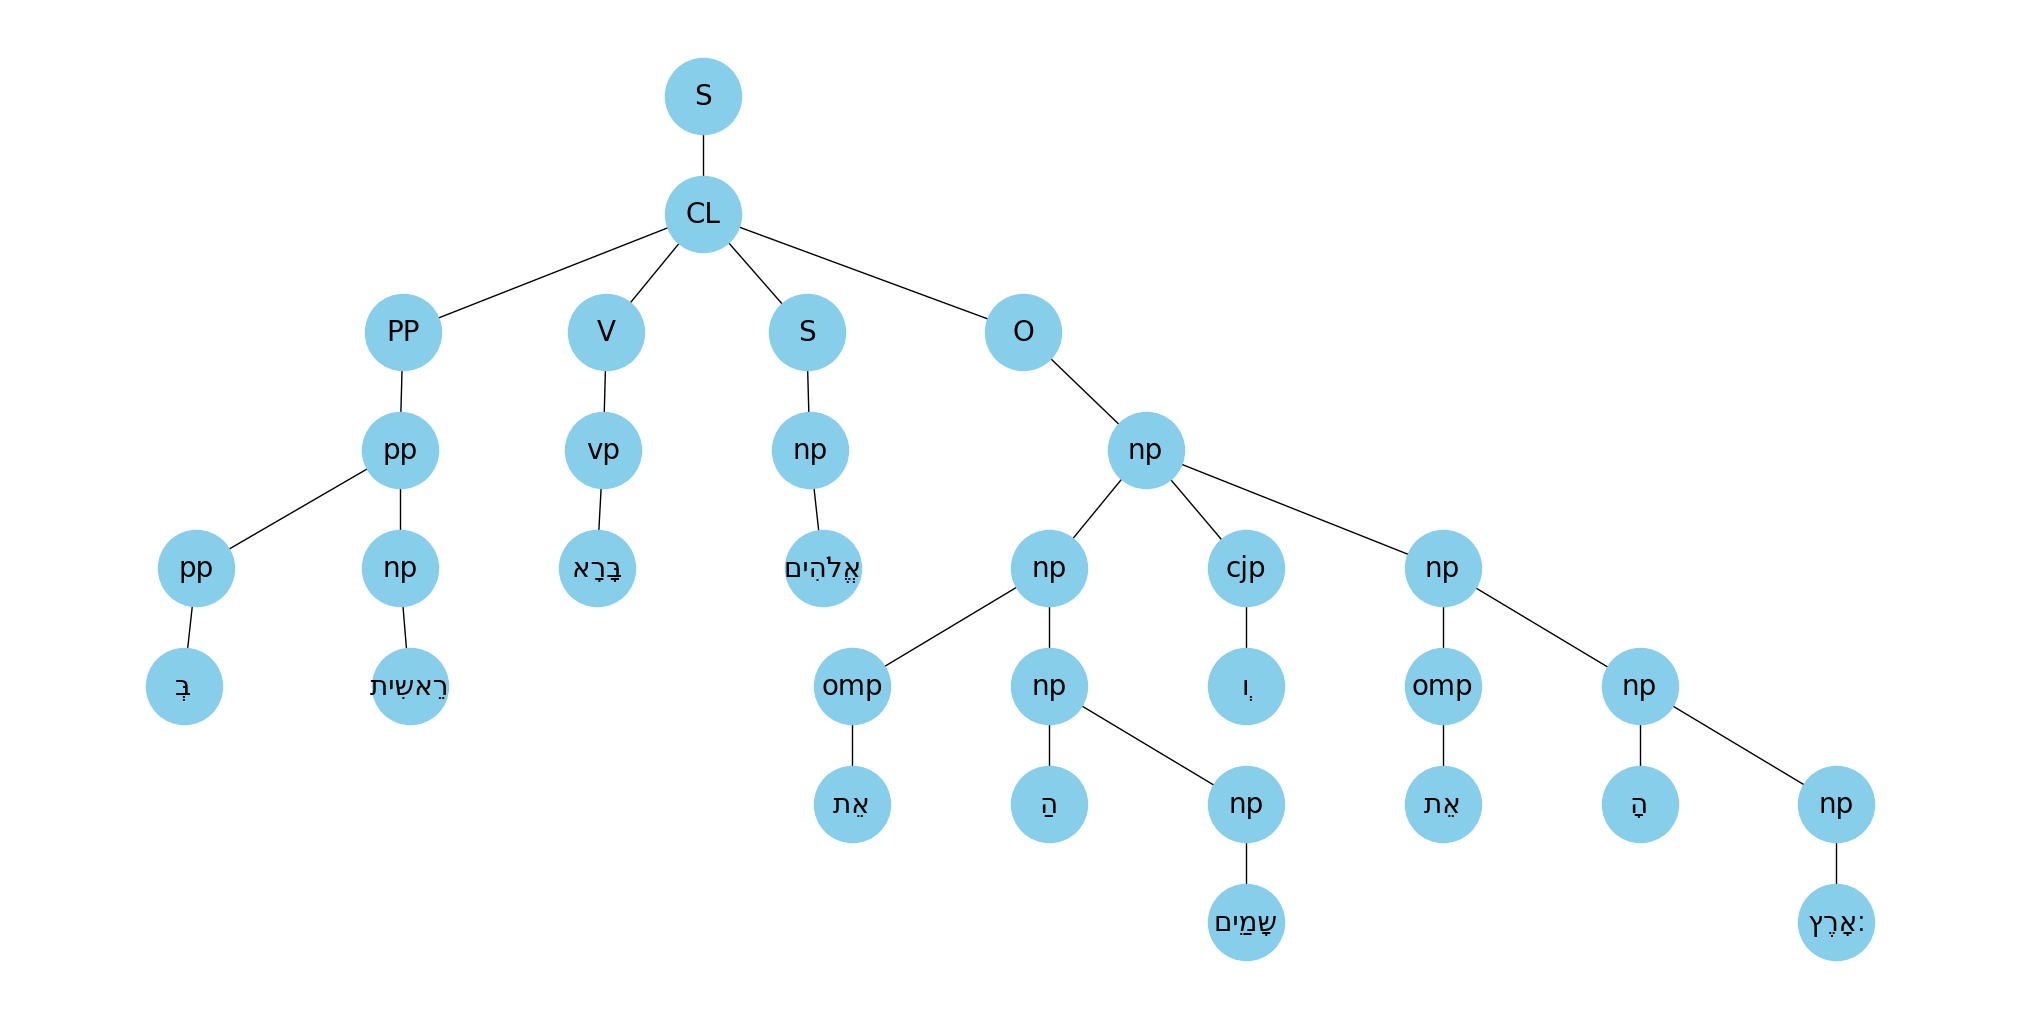

In [42]:
import re
import xml.etree.ElementTree as ET
import networkx as nx
import matplotlib.pyplot as plt
from bidi.algorithm import get_display

def remove_hebrew_accents(text):
    # Remove Hebrew accents and combining characters
    return re.sub(r'[\u0591-\u05AF\u05BD\u05BF\u05C1\u05C2\u05C4\u05C5\u05C7]', '', text)

def add_nodes_recursive_mpl(node, graph, parent=None):
    current_id = int(node.attrib['nodeId'])
    
    if 'Unicode' in node.attrib:
        label = remove_hebrew_accents(node.attrib['Unicode'])
    else:
        label = node.attrib['Cat']
        
    graph.add_node(current_id, label=label)
    
    if parent is not None:
        graph.add_edge(parent, current_id)
        
    for child in node.findall('Node'):
        add_nodes_recursive_mpl(child, graph, current_id)

def visualize_tree_mpl(xml_string):
    tree = ET.ElementTree(ET.fromstring(xml_string))
    root = tree.getroot().find(".//Node[@Cat='S']")

    g = nx.DiGraph()
    add_nodes_recursive_mpl(root, g)

    pos = nx.drawing.nx_agraph.graphviz_layout(g, prog='dot', args='-Gnodesep=0.1')
    plt.figure(figsize=(20, 10))
    
    nx.draw(g, pos, with_labels=False, arrows=False, node_size=3000, node_color="skyblue")
    
    labels = {n: get_display(g.nodes[n]['label']) for n in g.nodes}
    nx.draw_networkx_labels(g, pos, labels=labels, font_family='DejaVu Sans', font_size=20)
    
    plt.show()

visualize_tree_mpl(xml_data)

In [18]:
import xml.etree.ElementTree as ET

def print_tree(node, indent=0, is_last=True):
    node_info = node.attrib['Cat'] if 'Cat' in node.attrib else node.text
    if 'Unicode' in node.attrib:
        node_info += f" ({node.attrib['Unicode']})"
    
    branch = "└── " if is_last else "├── "
    padding = "    " if is_last else "│   "
    
    print(f"{''.join([padding] * (indent-1))}{branch if indent > 0 else ''}{node_info}")
    
    children = list(node)
    for idx, child in enumerate(children):
        print_tree(child, indent + 1, idx == len(children) - 1)

root = ET.fromstring(xml_data)
tree_node = root.find('.//Tree/Node')

print_tree(tree_node)

S
└── CL
│   ├── PP
        └── pp
│   │   │   ├── pp
                └── prep (בְּ‎)
            └── np
                └── noun (רֵאשִׁ֖ית‎)
│   ├── V
        └── vp
            └── verb (בָּרָ֣א‎)
│   ├── S
        └── np
            └── noun (אֱלֹהִ֑ים‎)
    └── O
        └── np
│   │   │   ├── np
│   │   │   │   ├── omp
                    └── om (אֵ֥ת‎)
                └── np
│   │   │   │   │   ├── art (הַ‎)
                    └── np
                        └── noun (שָּׁמַ֖יִם‎)
│   │   │   ├── cjp
                └── cj (וְ‎)
            └── np
│   │   │   │   ├── omp
                    └── om (אֵ֥ת‎)
                └── np
│   │   │   │   │   ├── art (הָ‎)
                    └── np
                        └── noun (׃‎אָֽרֶץ‎)


In [19]:
def print_tree(node, indent=0):
    node_info = node.attrib['Cat'] if 'Cat' in node.attrib else node.text
    if 'Unicode' in node.attrib:
        node_info += f" ({node.attrib['Unicode']})"
    
    print(f"{' ' * indent}{node_info}")
    
    for child in node:
        print_tree(child, indent + 2)

root = ET.fromstring(xml_data)
tree_node = root.find('.//Tree/Node')

print_tree(tree_node)

S
  CL
    PP
      pp
        pp
          prep (בְּ‎)
        np
          noun (רֵאשִׁ֖ית‎)
    V
      vp
        verb (בָּרָ֣א‎)
    S
      np
        noun (אֱלֹהִ֑ים‎)
    O
      np
        np
          omp
            om (אֵ֥ת‎)
          np
            art (הַ‎)
            np
              noun (שָּׁמַ֖יִם‎)
        cjp
          cj (וְ‎)
        np
          omp
            om (אֵ֥ת‎)
          np
            art (הָ‎)
            np
              noun (׃‎אָֽרֶץ‎)
